# Objective

In this notebook, I wil conduct some processes to build models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import phik

from matplotlib import pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv("dataset/data_clean.csv")
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4,0.03,4.0,3,...,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3.0,4,0.03,4.0,0,...,4.0,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,NaN,Scientist,19114.12,NaN,3.0,4,0.03,4.0,3,...,4.0,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3.0,4,0.03,4.0,5,...,4.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4,0.03,4.0,6,...,4.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4.0,6,0.07,2.0,23,...,3.0,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25.0,Mechanic,39628.99,3359.415833,4.0,6,0.07,2.0,18,...,3.0,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25.0,Mechanic,39628.99,3359.415833,4.0,6,57.29,2.0,27,...,3.0,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,25.0,Mechanic,39628.99,3359.415833,4.0,6,0.07,2.0,20,...,3.0,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df.isna().sum()

Month                           0
Age                          5825
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  8661
Delay_from_due_date             0
Num_of_Delayed_Payment       9724
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
interval_cols = df.select_dtypes(include=["int", "float"]).columns

# Drop age above 70 y.o

In [6]:
df_clean = df.copy()

<Axes: >

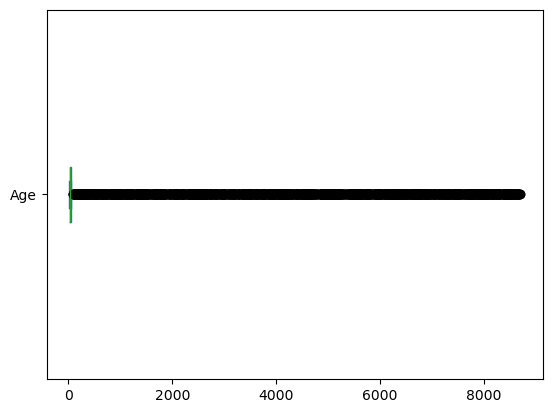

In [7]:
df_clean["Age"].plot(kind="box", vert=False)

- Age distribution on the dataset is illogical.
- This [ref](https://ourworldindata.org/life-expectancy#:~:text=In%202021%2C%20the%20global%20average,expectancy%20higher%20than%2040%20years.) shows that the global average of life expenctancy is just over 70.
- These data might appear because of system failures
- Thus, I will drop data with age over 70

In [8]:
df_clean = df_clean[df_clean["Age"]<=70]

# Feature & Target Separation

In [9]:
X, y = df_clean.drop(columns=["Credit_Score"]), df_clean["Credit_Score"]

# Data Splitting

In this notebook, I will use 20% of the dataset for test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=9
)

# Missing Value Handling

- In this section I will select top 2 features with high correlation with column of interest using 0.3 as the correlation threshold.
- Then, I will analyze missing values of column of interests with them

In [11]:
def show_corr_plot_of_col(
	col:str, 
	df: pd.DataFrame,
	interval_cols: list = interval_cols
)->None:
	"""
	Show heatmap of correlation of a specific col in the dataframe using phik

    	params:
            col (str) -> column of interest
            df (DataFrame) -> data source
            interval_cols (list) -> list of numerical columns [default: `interval_cols`]
            
        return: None
	"""

	sns.heatmap(
		df.phik_matrix(
			interval_cols=interval_cols
		)[[col]].sort_values(by=col, ascending=False).drop(index=[col]),
		annot=True
	)

	plt.show()


In [12]:
def show_train_test_set_shape(
	X_train: pd.DataFrame, 
	X_test: pd.DataFrame, 
	y_train: pd.Series, 
	y_test: pd.Series, 
) -> None:
	"""
	Print shape of train and set set

        params:
            X_train (DataFrame): features for training
            y_train (Series): labels for training
            X_test (DataFrame): features for training
            y_test (Series): labels for training

        return: None
	"""
	
	print("X_train shape: ", X_train.shape)
	print("X_test shape: ", X_test.shape)
	print("y_train shape: ", y_train.shape)
	print("y_test shape: ", y_test.shape)

In [13]:
def drop_rows_on_train_test_set(
	X_train: pd.DataFrame, 
	X_test: pd.DataFrame, 
	y_train: pd.Series, 
	y_test: pd.Series, 
	index_to_drop_on_train: list,
	index_to_drop_on_test: list
) -> tuple:
	"""
	Drop index from `X_train` and `X_test`

        params:
            X_train (DataFrame): features of train set
            X_test (DataFrame): features of test set
            y_train (Series): label of train set
            y_test (Series): label of test set
            index_to_drop_on_train (list) -> list of index to drop for train set
            index_to_drop_on_train (list) -> list of index to drop for test set

    	return:
             tuple contains X_train, y_train, X_test, y_test after index dropping process
	"""

	# print shape before dropping rows with missing values
	print("Train-test set shape before dropping")
	show_train_test_set_shape(X_train, X_test, y_train, y_test)

	# drop missing values in train set
	X_train_dropped = X_train.drop(index=index_to_drop_on_train)
	y_train_dropped = y_train.drop(index=index_to_drop_on_train)

	# drop missing values in test set
	print("\nTrain-test set shape after dropping")
	X_test_dropped = X_test.drop(index=index_to_drop_on_test)
	y_test_dropped = y_test.drop(index=index_to_drop_on_test)

	# print shape after dropping rows with missing values
	show_train_test_set_shape(X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped)
	
	return X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped


In [14]:
def get_missing_value_idxs_series(series: pd.Series)->list:
	"""
	Get list of indexes containing missing values in :series
	
    	param:
            series (Series): data source
        
    	return:
            list containing index of missing values
	"""
	return list(series[series.isna()].index.values)

In [15]:
X_train.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11045
Num_Bank_Accounts              15
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  6454
Delay_from_due_date             0
Num_of_Delayed_Payment       7150
Changed_Credit_Limit         1543
Num_Credit_Inquiries         1484
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           6624
Payment_of_Min_Amount        9003
Total_EMI_per_month             0
Amount_invested_monthly      6463
Payment_Behaviour            5640
Monthly_Balance               870
dtype: int64

## Monthly_Inhand_Salary

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


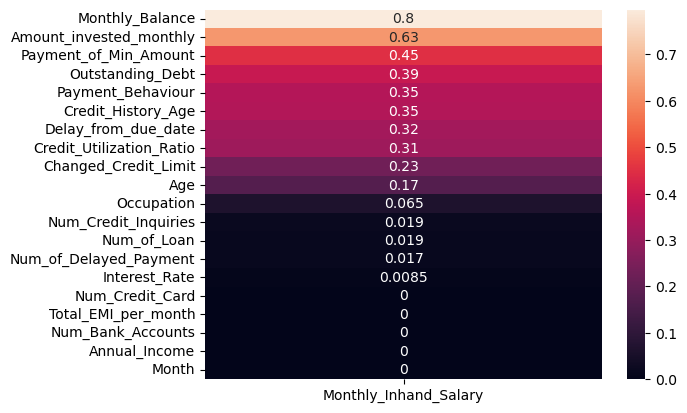

In [16]:
show_corr_plot_of_col("Monthly_Inhand_Salary", X_train)

In [17]:
missing_monthly_inhand_salary = X_train[X_train["Monthly_Inhand_Salary"].isna()]
non_missing_monthly_inhand_salary = X_train.dropna(subset=["Monthly_Inhand_Salary"])

<Axes: >

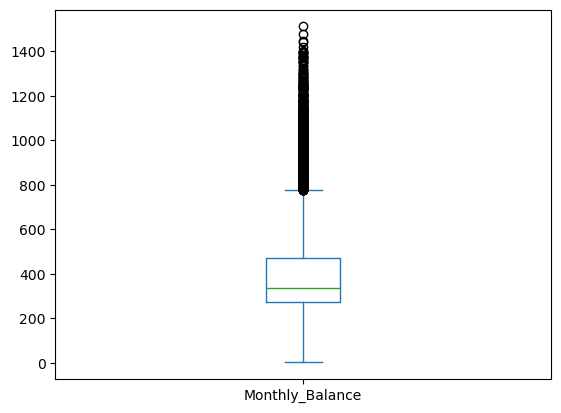

In [18]:
missing_monthly_inhand_salary["Monthly_Balance"].plot(kind="box")

<Axes: >

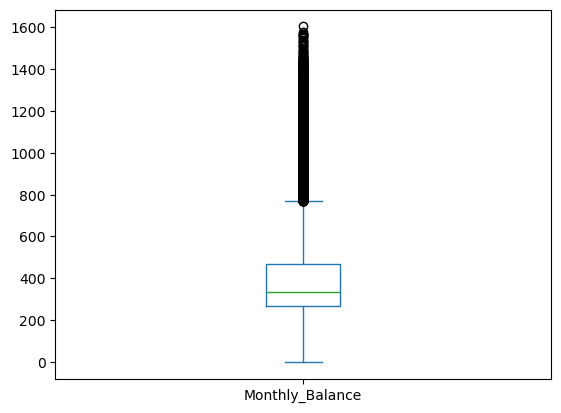

In [19]:
non_missing_monthly_inhand_salary["Monthly_Balance"].plot(kind="box")

<Axes: >

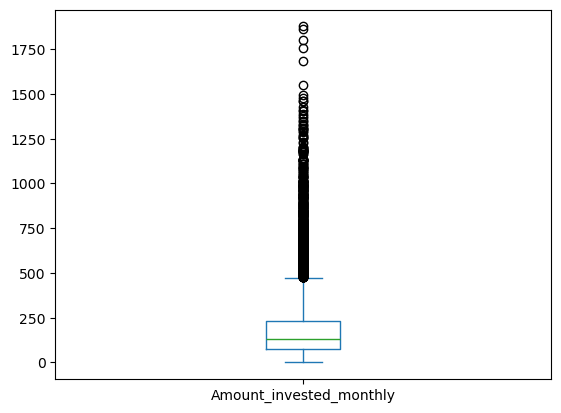

In [20]:
missing_monthly_inhand_salary["Amount_invested_monthly"].plot(kind="box")

<Axes: >

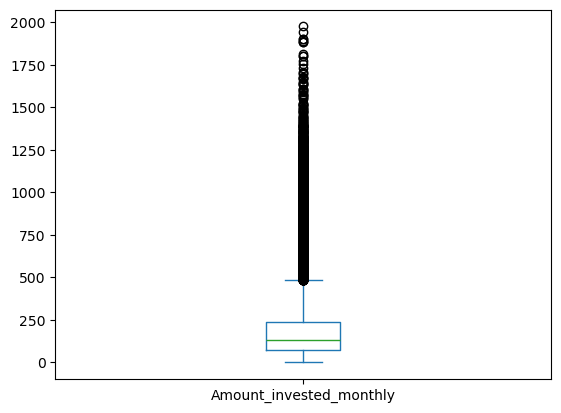

In [21]:
non_missing_monthly_inhand_salary["Amount_invested_monthly"].plot(kind="box")

- Distribution of monthly_balance and amount_invested_monthly on missing and non-missing missing monthly_inhand_salary are pretty identical
- Thus, there's no pattern to reveal the cause of missing values

In [22]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Monthly_Inhand_Salary"]),
	get_missing_value_idxs_series(X_test["Monthly_Inhand_Salary"]),
)

Train-test set shape before dropping
X_train shape:  (73892, 21)
X_test shape:  (18473, 21)
y_train shape:  (73892,)
y_test shape:  (18473,)

Train-test set shape after dropping
X_train shape:  (62847, 21)
X_test shape:  (15643, 21)
y_train shape:  (62847,)
y_test shape:  (15643,)


## Num_Bank_Accounts

In [23]:
X_train["Num_Bank_Accounts"].isna().sum()

14

- Since there are only 14 missing values, it's hard to find patterns to see why are these missing values present.
- Thus I will delete these data

In [24]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Num_Bank_Accounts"]),
	get_missing_value_idxs_series(X_test["Num_Bank_Accounts"]),
)

Train-test set shape before dropping
X_train shape:  (62847, 21)
X_test shape:  (15643, 21)
y_train shape:  (62847,)
y_test shape:  (15643,)

Train-test set shape after dropping
X_train shape:  (62833, 21)
X_test shape:  (15638, 21)
y_train shape:  (62833,)
y_test shape:  (15638,)


## Num_of_Loan

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


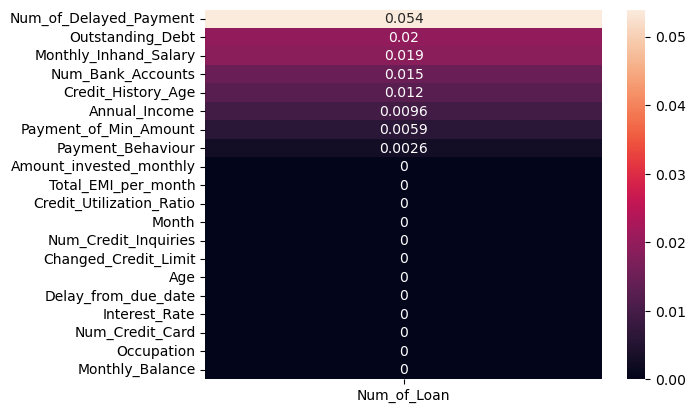

In [25]:
show_corr_plot_of_col("Num_of_Loan", X_train)

- It appears that all variables have very low correlation with Num_of_Loan
- This makes the analysis to find out why these missing values appear impossible
- Thus, I will drop these missing values

In [26]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Num_of_Loan"]),
	get_missing_value_idxs_series(X_test["Num_of_Loan"]),
)

Train-test set shape before dropping
X_train shape:  (62833, 21)
X_test shape:  (15638, 21)
y_train shape:  (62833,)
y_test shape:  (15638,)

Train-test set shape after dropping
X_train shape:  (57357, 21)
X_test shape:  (14321, 21)
y_train shape:  (57357,)
y_test shape:  (14321,)


## Num_of_Delayed_Payment

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


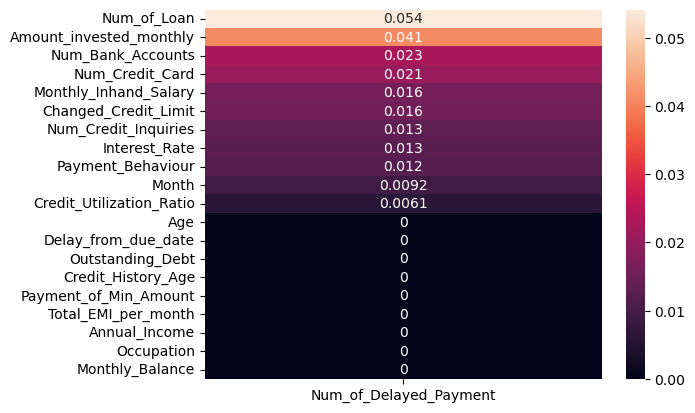

In [27]:
show_corr_plot_of_col("Num_of_Delayed_Payment", X_train)

- It appears that all variables have very low correlation with Num_of_Loan
- This makes the analysis to find out why these missing values appear impossible
- Thus, I will drop these missing values

In [28]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Num_of_Delayed_Payment"]),
	get_missing_value_idxs_series(X_test["Num_of_Delayed_Payment"]),
)

Train-test set shape before dropping
X_train shape:  (57357, 21)
X_test shape:  (14321, 21)
y_train shape:  (57357,)
y_test shape:  (14321,)

Train-test set shape after dropping
X_train shape:  (51807, 21)
X_test shape:  (12905, 21)
y_train shape:  (51807,)
y_test shape:  (12905,)


## Changed_Credit_Limit

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


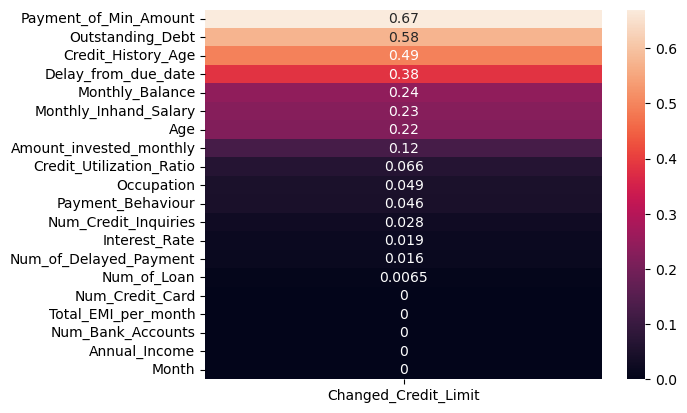

In [29]:
show_corr_plot_of_col("Changed_Credit_Limit", X_train)

In [30]:
missing_changed_credit_limit = X_train[X_train["Changed_Credit_Limit"].isna()]
non_missing_changed_credit_limit = X_train.dropna(subset=["Changed_Credit_Limit"])

In [31]:
missing_changed_credit_limit["Payment_of_Min_Amount"].value_counts(normalize=True).round(2)

Payment_of_Min_Amount
Yes    0.59
No     0.41
Name: proportion, dtype: float64

In [32]:
non_missing_changed_credit_limit["Payment_of_Min_Amount"].value_counts(normalize=True).round(2)

Payment_of_Min_Amount
Yes    0.6
No     0.4
Name: proportion, dtype: float64

<Axes: >

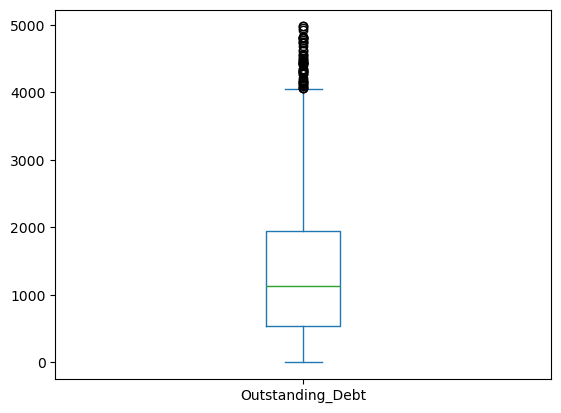

In [34]:
missing_changed_credit_limit["Outstanding_Debt"].plot(kind="box")

<Axes: >

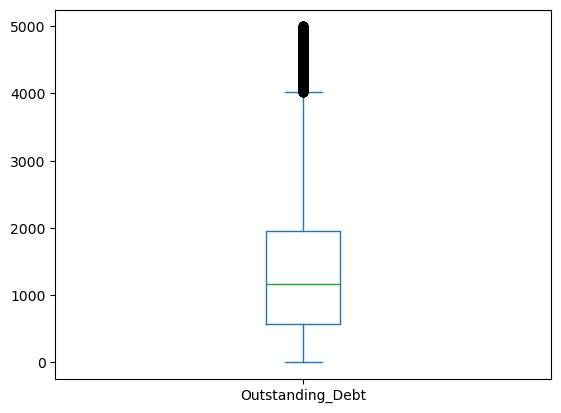

In [35]:
non_missing_changed_credit_limit["Outstanding_Debt"].plot(kind="box")

- The proportions of payment of min amount for missing and non-missing changed credit limit are quite similar.
- It's also happened in the same way with Outstanding_Debt
- Since there's no information to reveal the cause of missing values, I will drop rows with missing changed credit limit

In [36]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Changed_Credit_Limit"]),
	get_missing_value_idxs_series(X_test["Changed_Credit_Limit"]),
)

Train-test set shape before dropping
X_train shape:  (51807, 21)
X_test shape:  (12905, 21)
y_train shape:  (51807,)
y_test shape:  (12905,)

Train-test set shape after dropping
X_train shape:  (50726, 21)
X_test shape:  (12634, 21)
y_train shape:  (50726,)
y_test shape:  (12634,)


## Num_Credit_Inquiries

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


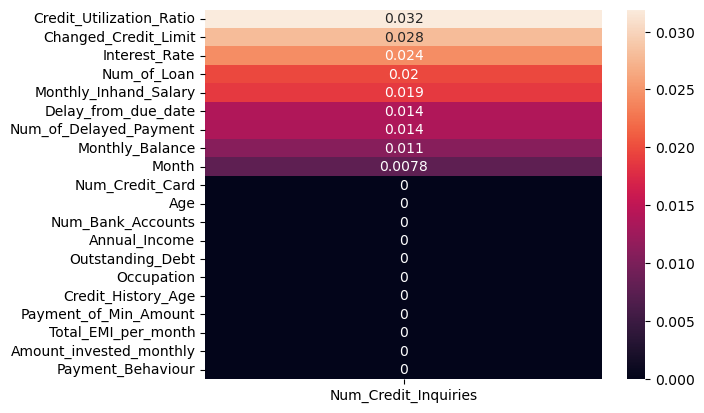

In [37]:
show_corr_plot_of_col("Num_Credit_Inquiries", X_train)

- It appears that all variables have very low correlation with Num_of_Loan
- This makes the analysis to find out why these missing values appear impossible
- Thus, I will drop these missing values

In [38]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
    X_train,
    X_test,
    y_train,
    y_test,
    get_missing_value_idxs_series(X_train["Num_Credit_Inquiries"]),
    get_missing_value_idxs_series(X_test["Num_Credit_Inquiries"])
)

Train-test set shape before dropping
X_train shape:  (50726, 21)
X_test shape:  (12634, 21)
y_train shape:  (50726,)
y_test shape:  (12634,)

Train-test set shape after dropping
X_train shape:  (49689, 21)
X_test shape:  (12422, 21)
y_train shape:  (49689,)
y_test shape:  (12422,)


## Credit_History_Age

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


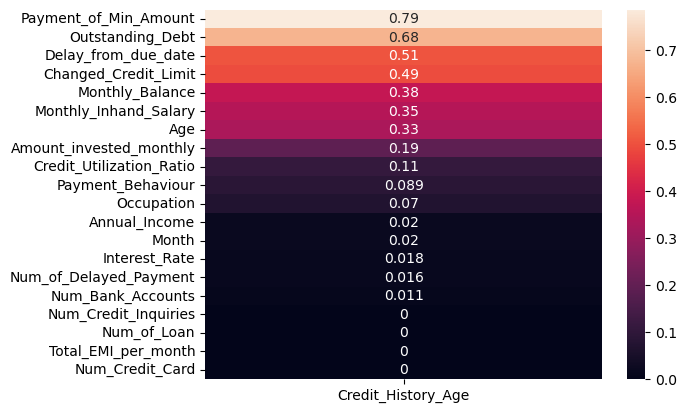

In [39]:
show_corr_plot_of_col("Credit_History_Age", X_train)

In [40]:
missing_credit_history_age = X_train.loc[
    X_train["Credit_History_Age"].isna(), 
    ["Payment_of_Min_Amount", "Outstanding_Debt"]
]

In [41]:
non_missing_credit_history_age = X_train.dropna(subset=["Credit_History_Age"])[["Payment_of_Min_Amount", "Outstanding_Debt"]]

<Axes: >

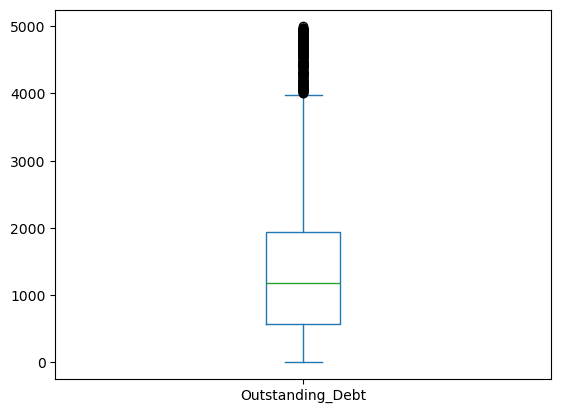

In [42]:
missing_credit_history_age["Outstanding_Debt"].plot(kind="box")

<Axes: >

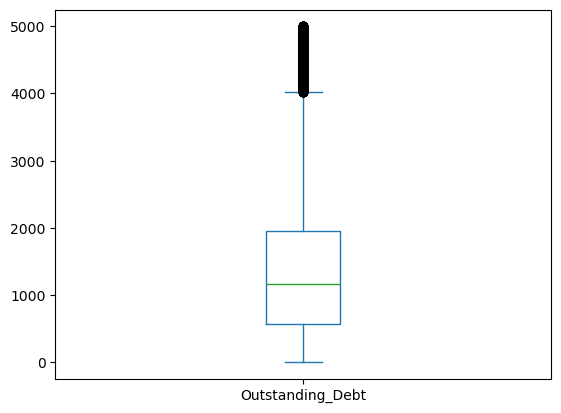

In [43]:
non_missing_credit_history_age["Outstanding_Debt"].plot(kind="box")

In [44]:
missing_credit_history_age["Payment_of_Min_Amount"].value_counts(normalize=True)

Payment_of_Min_Amount
Yes    0.607234
No     0.392766
Name: proportion, dtype: float64

In [45]:
non_missing_credit_history_age["Payment_of_Min_Amount"].value_counts(normalize=True)

Payment_of_Min_Amount
Yes    0.597607
No     0.402393
Name: proportion, dtype: float64

- There's no pattern to describe missing values in Credit history age from Payment of min amount and outstanding debt
- Thus, I will drop missing values in credit history age

In [46]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
    X_train,
    X_test,
    y_train,
    y_test,
    get_missing_value_idxs_series(X_train["Credit_History_Age"]),
    get_missing_value_idxs_series(X_test["Credit_History_Age"])
)

Train-test set shape before dropping
X_train shape:  (49689, 21)
X_test shape:  (12422, 21)
y_train shape:  (49689,)
y_test shape:  (12422,)

Train-test set shape after dropping
X_train shape:  (45236, 21)
X_test shape:  (11263, 21)
y_train shape:  (45236,)
y_test shape:  (11263,)


## Payment_of_Min_Amount

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


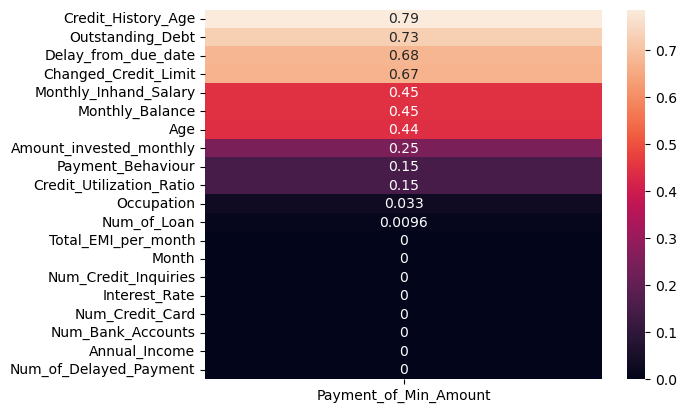

In [47]:
show_corr_plot_of_col("Payment_of_Min_Amount", X_train)

In [48]:
missing_payment_of_min_amount = X_train[X_train["Payment_of_Min_Amount"].isna()].drop(columns=["Payment_of_Min_Amount"])

In [49]:
non_missing_payment_of_min_amount = X_train.dropna(subset=["Payment_of_Min_Amount"]).drop(columns=["Payment_of_Min_Amount"])

<Axes: >

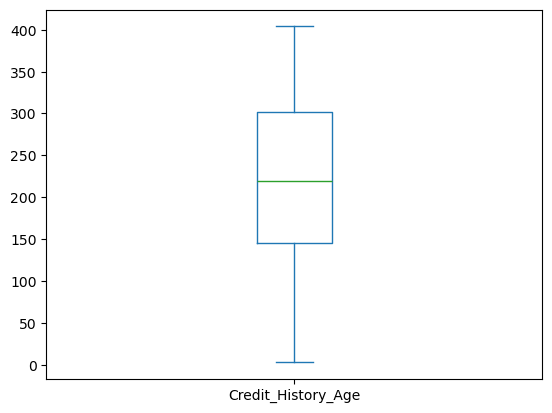

In [50]:
missing_payment_of_min_amount["Credit_History_Age"].plot(kind="box")

<Axes: >

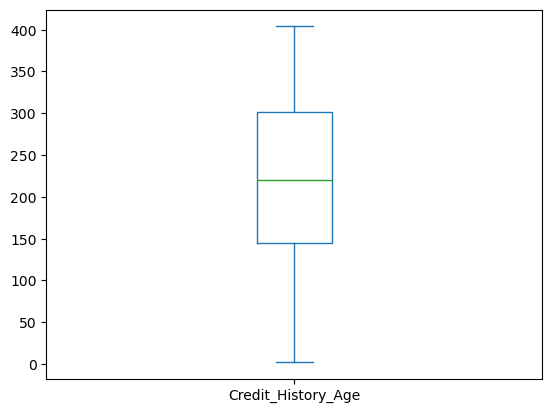

In [51]:
non_missing_payment_of_min_amount["Credit_History_Age"].plot(kind="box")

- Distribution of credit history age on missing and non-missing payment of min amount are the same
- Thus, there's no pattern to reveal the cause of missing values

<Axes: >

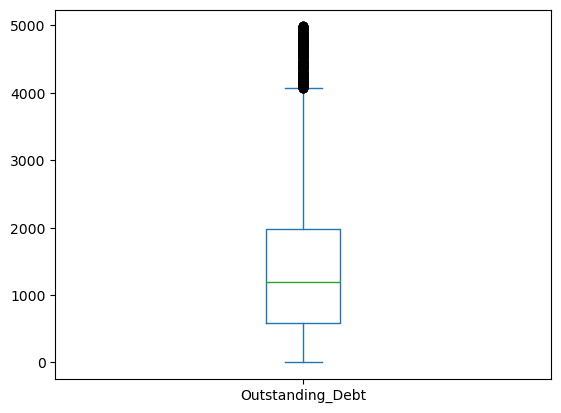

In [52]:
missing_payment_of_min_amount["Outstanding_Debt"].plot(kind="box")

<Axes: >

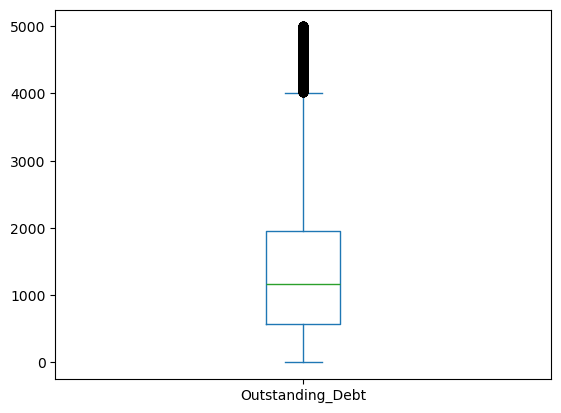

In [53]:
non_missing_payment_of_min_amount["Outstanding_Debt"].plot(kind="box")

- Distribution of outstanding_debt on missing and non-missing missing payment of min amount are also the same.
- Thus, there's no pattern to reveal the cause of missing values

- In conclusion, there's no pattern to reveal the cause of missing values. Thus, I conclude that missing values in Age is MCAR and safe to drop

In [54]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Payment_of_Min_Amount"]),
	get_missing_value_idxs_series(X_test["Payment_of_Min_Amount"]),
)

Train-test set shape before dropping
X_train shape:  (45236, 21)
X_test shape:  (11263, 21)
y_train shape:  (45236,)
y_test shape:  (11263,)

Train-test set shape after dropping
X_train shape:  (39782, 21)
X_test shape:  (10022, 21)
y_train shape:  (39782,)
y_test shape:  (10022,)


## Amount_invested_monthly

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


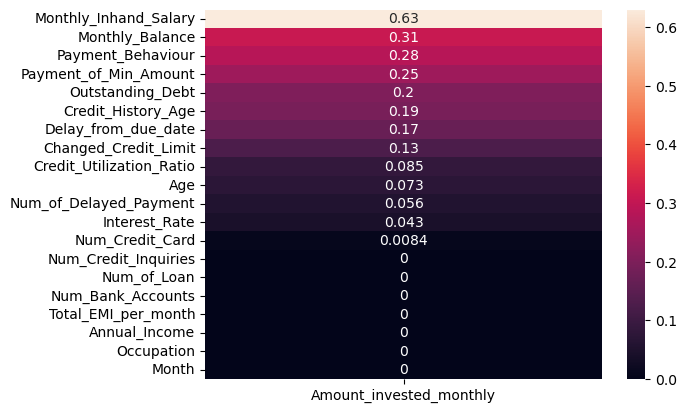

In [74]:
show_corr_plot_of_col(
    "Amount_invested_monthly",
    X_train
)

In [75]:
missing_amount_invested_monthly = X_train[X_train["Amount_invested_monthly"].isna()]
non_missing_amount_invested_monthly = X_train.dropna(subset=["Amount_invested_monthly"])

<Axes: >

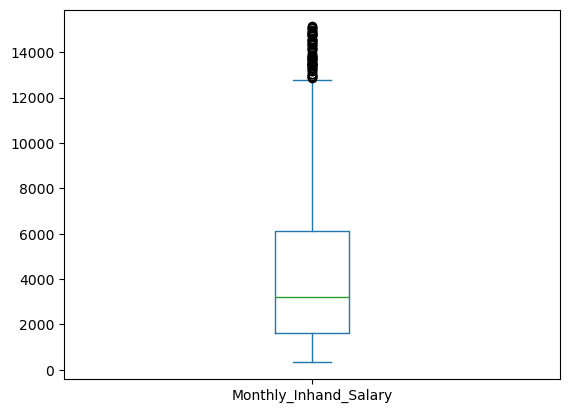

In [76]:
missing_amount_invested_monthly["Monthly_Inhand_Salary"].plot(kind="box")

<Axes: >

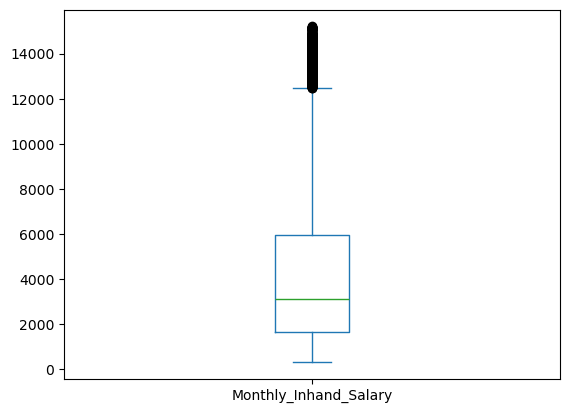

In [77]:
non_missing_amount_invested_monthly["Monthly_Inhand_Salary"].plot(kind="box")

- Distribution of monthly inhand salary on non missing values in amount invested monthly is a subset of missing values in amount invested monthly

In [78]:
missing_amount_invested_monthly["Payment_Behaviour"].value_counts(normalize=True).round(2)

Payment_Behaviour
Low_spent_Small_value_payments      0.27
High_spent_Medium_value_payments    0.18
High_spent_Large_value_payments     0.16
Low_spent_Medium_value_payments     0.15
High_spent_Small_value_payments     0.13
Low_spent_Large_value_payments      0.12
Name: proportion, dtype: float64

In [79]:
non_missing_amount_invested_monthly["Payment_Behaviour"].value_counts(normalize=True).round(2)

Payment_Behaviour
Low_spent_Small_value_payments      0.28
High_spent_Medium_value_payments    0.19
Low_spent_Medium_value_payments     0.15
High_spent_Large_value_payments     0.15
High_spent_Small_value_payments     0.12
Low_spent_Large_value_payments      0.11
Name: proportion, dtype: float64

- Distribution of monthly inhand salary and payment behaviour on missing and non-missing values in amount invested monthly are quite similar
- Indicating, there's no pattern to identify the cause of missing values
- Thus, I will drop these missing values

In [80]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Amount_invested_monthly"]),
	get_missing_value_idxs_series(X_test["Amount_invested_monthly"]),
)

Train-test set shape before dropping
X_train shape:  (39782, 21)
X_test shape:  (10022, 21)
y_train shape:  (39782,)
y_test shape:  (10022,)

Train-test set shape after dropping
X_train shape:  (36328, 21)
X_test shape:  (9154, 21)
y_train shape:  (36328,)
y_test shape:  (9154,)


## Payment_Behaviour

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


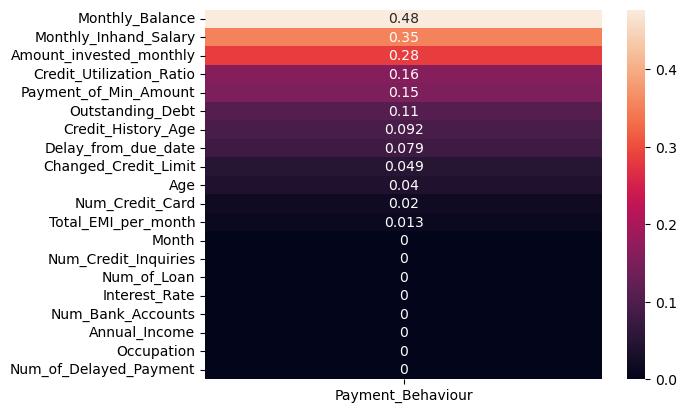

In [81]:
show_corr_plot_of_col("Payment_Behaviour", X_train)

In [82]:
missing_payment_behaviour = X_train[X_train["Payment_Behaviour"].isna()]
non_missing_payment_behaviour = X_train.dropna(subset=["Payment_Behaviour"])

<Axes: >

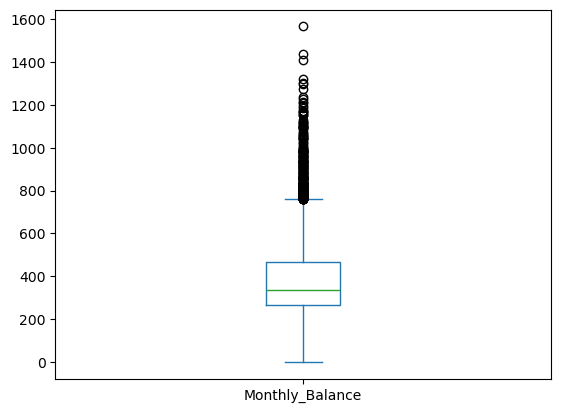

In [83]:
missing_payment_behaviour["Monthly_Balance"].plot(kind="box")

<Axes: >

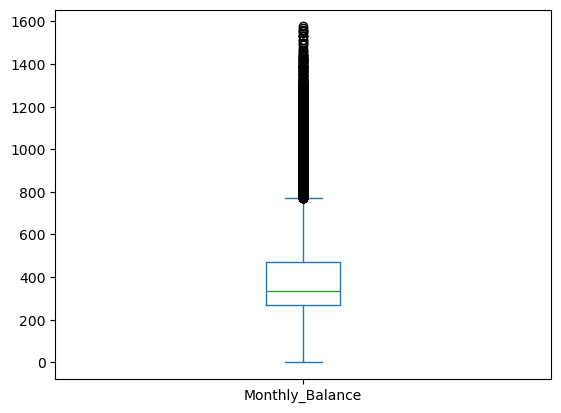

In [84]:
non_missing_payment_behaviour["Monthly_Balance"].plot(kind="box")

<Axes: >

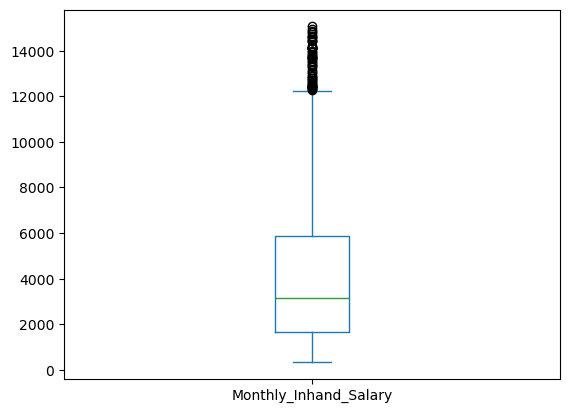

In [85]:
missing_payment_behaviour["Monthly_Inhand_Salary"].plot(kind="box")

<Axes: >

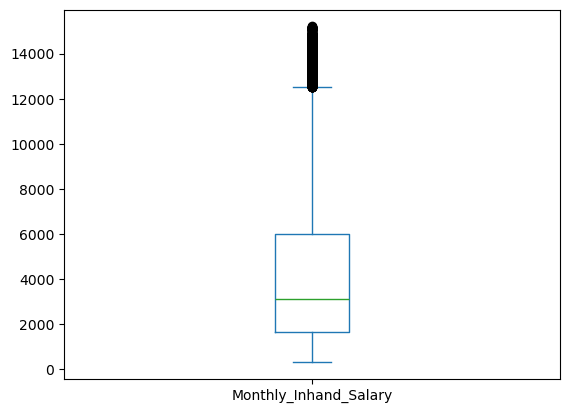

In [86]:
non_missing_payment_behaviour["Monthly_Inhand_Salary"].plot(kind="box")

- Distribution of monthly salary on missing and non-missing values in payment behaviour is the same
- This also applies to on monthly inhand salary
- Hence, there's no case revealed to explain the missing values
- Consequently, I will drop these missing values

In [87]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Payment_Behaviour"]),
	get_missing_value_idxs_series(X_test["Payment_Behaviour"]),
)

Train-test set shape before dropping
X_train shape:  (36328, 21)
X_test shape:  (9154, 21)
y_train shape:  (36328,)
y_test shape:  (9154,)

Train-test set shape after dropping
X_train shape:  (33559, 21)
X_test shape:  (8511, 21)
y_train shape:  (33559,)
y_test shape:  (8511,)


## Monthly_Balance

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


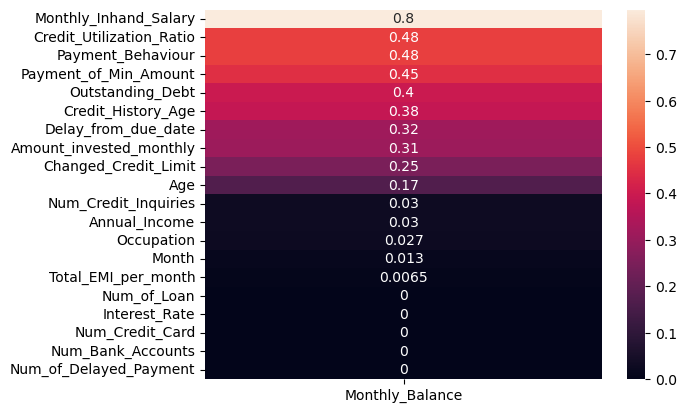

In [88]:
show_corr_plot_of_col(
    "Monthly_Balance",
    X_train
)

In [89]:
missing_monthly_balance = X_train[X_train["Monthly_Balance"].isna()]
non_missing_monthly_balance = X_train.dropna(subset=["Monthly_Balance"])

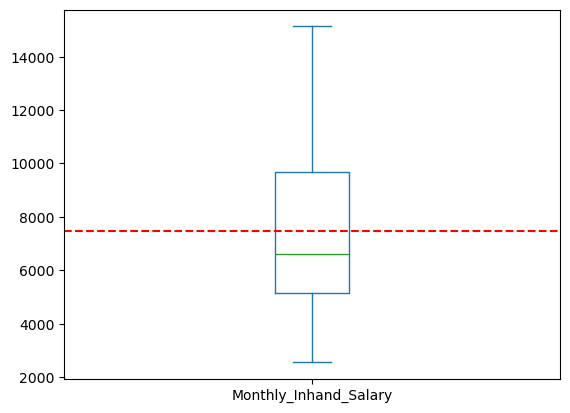

In [90]:
missing_monthly_balance["Monthly_Inhand_Salary"].plot(kind="box")
plt.axhline(missing_monthly_balance["Monthly_Inhand_Salary"].mean(), color="r", linestyle="--")

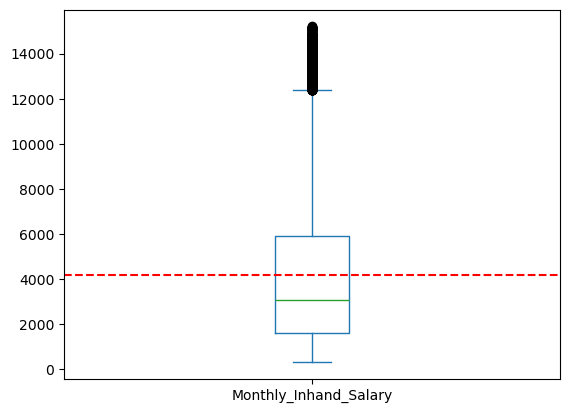

In [91]:
non_missing_monthly_balance["Monthly_Inhand_Salary"].plot(kind="box")
plt.axhline(non_missing_monthly_balance["Monthly_Inhand_Salary"].mean(), color="r", linestyle="--")

In [92]:
missing_monthly_balance.shape[0]

372

- The distribution of Monthly Inhand Salary for missing monthly balance is higher than non-missing monthly balance
- But, there are only 372 observations with missing monthly balance
- Thus, I will drop these rows

In [93]:
X_train, X_test, y_train, y_test = drop_rows_on_train_test_set(
	X_train,
	X_test,
	y_train,
	y_test,
	get_missing_value_idxs_series(X_train["Monthly_Balance"]),
	get_missing_value_idxs_series(X_test["Monthly_Balance"]),
)

Train-test set shape before dropping
X_train shape:  (33559, 21)
X_test shape:  (8511, 21)
y_train shape:  (33559,)
y_test shape:  (8511,)

Train-test set shape after dropping
X_train shape:  (33187, 21)
X_test shape:  (8392, 21)
y_train shape:  (33187,)
y_test shape:  (8392,)


# Feature Engineering

## Outliers Handling

In [ ]:
X_train.select_dtypes(include="object").columns.value

In [ ]:
num_cols
cat_cols = ""